# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

In [16]:
X_train.shape

(60000, 28, 28)

Label: 0


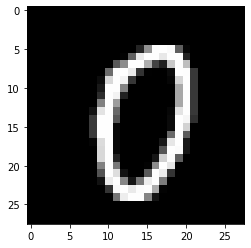

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
X_train_0_4 = []
y_train_0_4 = []
X_train_5_9 = []
y_train_5_9 = []
for i in range(0,y_train.shape[0]):
  if y_train[i] in [0,1,2,3,4]:
    X_train_0_4.append(X_train[i])
    y_train_0_4.append(y_train[i])
  else:
      X_train_5_9.append(X_train[i])
      y_train_5_9.append(y_train[i])

In [0]:
X_test_0_4 = []
y_test_0_4 = []
X_test_5_9 = []
y_test_5_9 = []
for i in range(0,y_test.shape[0]):
  if y_test[i] in [0,1,2,3,4]:
    X_test_0_4.append(X_test[i])
    y_test_0_4.append(y_test[i])
  else:
      X_test_5_9.append(X_test[i])
      y_test_5_9.append(y_test[i])


In [0]:
import numpy as np
X_train_0_4 = np.array(X_train_0_4)
y_train_0_4 = np.array(y_train_0_4)
X_train_5_9 = np.array(X_train_5_9)
y_train_5_9 = np.array(y_train_5_9)

X_test_0_4 = np.array(X_test_0_4)
y_test_0_4 = np.array(y_test_0_4)
X_test_5_9 = np.array(X_test_5_9)
y_test_5_9 = np.array(y_test_5_9)


## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [7]:
print("Shape of X_train_0_4 is - ",X_train_0_4.shape)
print("Shape of y_train_0_4 is - ",y_train_0_4.shape)
print("Shape of X_test_0_4 is - ",X_test_0_4.shape)
print("Shape of y_test_0_4 is - ",y_test_0_4.shape)
print("===="*10)
print("Shape of X_train_5_9 is - ",X_train_5_9.shape)
print("Shape of y_train_5_9 is - ",y_train_5_9.shape)
print("Shape of X_test_5_9 is - ",X_test_5_9.shape)
print("Shape of X_test_5_9 is - ",y_test_5_9.shape)

Shape of X_train_0_4 is -  (30596, 28, 28)
Shape of y_train_0_4 is -  (30596,)
Shape of X_test_0_4 is -  (5139, 28, 28)
Shape of y_test_0_4 is -  (5139,)
Shape of X_train_5_9 is -  (29404, 28, 28)
Shape of y_train_5_9 is -  (29404,)
Shape of X_test_5_9 is -  (4861, 28, 28)
Shape of X_test_5_9 is -  (4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
trainX_0_4 = X_train_0_4.reshape(X_train_0_4.shape[0], 28, 28,1 ).astype('float32')
testX_0_4 = X_test_0_4.reshape(X_test_0_4.shape[0], 28, 28,1 ).astype('float32')

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
trainX_0_4 /= 255
testX_0_4 /= 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [24]:
trainX_0_4.shape

(30596, 28, 28, 1)

In [25]:
trainX_0_4.shape[0]

30596

In [26]:
testX_0_4.shape[0]

5139

## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
from keras.utils import np_utils
trainY_0_4  = np_utils.to_categorical(y_train_0_4, 5)
testY_0_4  = np_utils.to_categorical(y_test_0_4 , 5)

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
# Define model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Max Pooling
model1.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model1.add(Dropout(0.2))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(5))
model1.add(Activation('softmax'))



## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [35]:
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model1.fit(trainX_0_4, trainY_0_4, batch_size=128, nb_epoch=10,validation_split=0.1, callbacks=callback_list)

Train on 27536 samples, validate on 3060 samples
Epoch 1/10
27536/27536 [==============================] - 2s 62us/step - loss: 0.0696 - acc: 0.9780 - val_loss: 0.0847 - val_acc: 0.9706
Epoch 2/10
27536/27536 [==============================] - 1s 51us/step - loss: 0.0666 - acc: 0.9784 - val_loss: 0.0729 - val_acc: 0.9739
Epoch 3/10
27536/27536 [==============================] - 1s 50us/step - loss: 0.0629 - acc: 0.9797 - val_loss: 0.0389 - val_acc: 0.9879
Epoch 4/10
27536/27536 [==============================] - 1s 51us/step - loss: 0.0591 - acc: 0.9816 - val_loss: 0.0383 - val_acc: 0.9876
Epoch 5/10
27536/27536 [==============================] - 1s 51us/step - loss: 0.0564 - acc: 0.9831 - val_loss: 0.0374 - val_acc: 0.9886
Epoch 6/10
27536/27536 [==============================] - 1s 52us/step - loss: 0.0520 - acc: 0.9831 - val_loss: 0.0373 - val_acc: 0.9886
Epoch 7/10
27536/27536 [==============================] - 1s 51us/step - loss: 0.0520 - acc: 0.9838 - val_loss: 0.0332 - val_acc:

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [36]:
scores = model1.evaluate(testX_0_4,testY_0_4, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.12%


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
# Define model
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.trainable = False
model1.add(Activation('relu'))
model1.trainable = False
# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.trainable = False
model1.add(Activation('relu'))
model1.trainable = False
# Max Pooling
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.trainable = False
# Dropout
model1.add(Dropout(0.2))
model1.trainable = False
# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(5))
model1.add(Activation('softmax'))



### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [41]:
print("Shape of X_train_5_9 is - ",X_train_5_9.shape)
print("Shape of y_train_5_9 is - ",y_train_5_9.shape)
print("Shape of X_test_5_9 is - ",X_test_5_9.shape)
print("Shape of X_test_5_9 is - ",y_test_5_9.shape)

Shape of X_train_5_9 is -  (29404, 28, 28)
Shape of y_train_5_9 is -  (29404,)
Shape of X_test_5_9 is -  (4861, 28, 28)
Shape of X_test_5_9 is -  (4861,)


In [0]:
y_train_5_9_new = []
for i in range(0,y_train_5_9.shape[0]):
      y_train_5_9_new.append((y_train_5_9[i]-5))

y_train_5_9_new = np.array(y_train_5_9_new)

In [0]:
y_test_5_9_new = []
for i in range(0,y_test_5_9.shape[0]):
      y_test_5_9_new.append((y_test_5_9[i]-5))

y_test_5_9_new = np.array(y_test_5_9_new)

In [47]:
y_test_5_9[0]

7

In [46]:
y_test_5_9_new[0]

2

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
trainX_5_9 = X_train_5_9.reshape(X_train_5_9.shape[0], 28, 28,1 ).astype('float32')
testX_5_9 = X_test_5_9.reshape(X_test_5_9.shape[0], 28, 28,1 ).astype('float32')

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
trainX_5_9 /= 255
testX_5_9 /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [50]:
trainX_5_9.shape

(29404, 28, 28, 1)

In [51]:
trainX_5_9.shape[0]

29404

In [52]:
testX_5_9.shape[0]

4861

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
from keras.utils import np_utils
trainY_5_9  = np_utils.to_categorical(y_train_5_9_new, 5)
testY_5_9  = np_utils.to_categorical(y_test_5_9_new , 5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [56]:
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model1.fit(trainX_5_9, trainY_5_9, batch_size=128, nb_epoch=10,validation_split=0.1, callbacks=callback_list)

Train on 26463 samples, validate on 2941 samples
Epoch 1/10
26463/26463 [==============================] - 2s 69us/step - loss: 0.8636 - acc: 0.7670 - val_loss: 0.2180 - val_acc: 0.9425
Epoch 2/10
26463/26463 [==============================] - 1s 51us/step - loss: 0.2511 - acc: 0.9180 - val_loss: 0.1583 - val_acc: 0.9595
Epoch 3/10
26463/26463 [==============================] - 1s 51us/step - loss: 0.1949 - acc: 0.9373 - val_loss: 0.1538 - val_acc: 0.9561
Epoch 4/10
26463/26463 [==============================] - 1s 51us/step - loss: 0.1707 - acc: 0.9464 - val_loss: 0.1186 - val_acc: 0.9694
Epoch 5/10
26463/26463 [==============================] - 1s 52us/step - loss: 0.1510 - acc: 0.9527 - val_loss: 0.1102 - val_acc: 0.9725
Epoch 6/10
26463/26463 [==============================] - 1s 50us/step - loss: 0.1369 - acc: 0.9558 - val_loss: 0.1036 - val_acc: 0.9728
Epoch 7/10
26463/26463 [==============================] - 1s 51us/step - loss: 0.1235 - acc: 0.9599 - val_loss: 0.0909 - val_acc:

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [57]:
scores = model1.evaluate(testX_5_9,testY_5_9, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.22%


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
filepath = "/content/drive/My Drive/AIML/NLP AND RECOMMENDED SYSTEMS/NLP PROJECT 1/tweets.csv"

In [0]:
df = pd.read_csv(filepath,encoding = 'ISO-8859-1')

In [127]:
df.shape

(9093, 3)

In [128]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [129]:
df.head(6)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product


In [130]:
df.is_there_an_emotion_directed_at_a_brand_or_product.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

### Drop null values
- drop all the rows with null values

In [0]:
df.dropna(inplace=True)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [132]:
df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [133]:
import string , re
import nltk,plotly
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;][‘’“”…]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
PUNCT_SYMBOLS_RE = re.compile('[%s]' % re.escape(string.punctuation))
NUM_RE = re.compile('\w*\d\w*') ## \w = [a-zA-Z0-9_]  \W = [^a-zA-Z0-9_]   -- Remove words containing numbers
STOPWORDS = set(stopwords.words('english'))


In [0]:
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = text.strip() # for removing extra spaces 

     
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = PUNCT_SYMBOLS_RE.sub('', text)
    text = NUM_RE.sub('', text)
 
   
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    #text = re.sub(r'\W+', '', text)
    return text

In [136]:
df.head(6)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion


In [0]:
df['tweet_text'] = df['tweet_text'].apply(clean_text)
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].apply(clean_text)
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].apply(clean_text)

In [138]:
df.head(6)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,iphone hrs tweeting riseaustin dead need upgra...,iphone,negative emotion
1,jessedee know fludapp awesome ipadiphone app y...,ipad iphone app,positive emotion
2,swonderlin wait ipad also sale ssw,ipad,positive emotion
3,ssw hope years festival isnt crashy years ipho...,ipad iphone app,negative emotion
4,ststate great stuff fri ssw marissa mayer goog...,google,positive emotion
7,ssw starting ctia around corner googleio hop s...,android,positive emotion


print dataframe

In [139]:
df.shape

(3291, 3)

## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [0]:
df_new = df[((df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'negative emotion')==True ) ^ ((df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'positive emotion')==True )] 

In [141]:
print(df_new.is_there_an_emotion_directed_at_a_brand_or_product.unique())
print(df_new.shape)

['negative emotion' 'positive emotion']
(3191, 3)


## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [143]:
df_new.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,iphone hrs tweeting riseaustin dead need upgra...,iphone,negative emotion
1,jessedee know fludapp awesome ipadiphone app y...,ipad iphone app,positive emotion
2,swonderlin wait ipad also sale ssw,ipad,positive emotion
3,ssw hope years festival isnt crashy years ipho...,ipad iphone app,negative emotion
4,ststate great stuff fri ssw marissa mayer goog...,google,positive emotion


In [0]:
df_new['is_there_an_emotion_directed_at_a_brand_or_product'] = df_new['is_there_an_emotion_directed_at_a_brand_or_product'].map(lambda x: 1 if x=='positive emotion' else 0)

In [145]:
df_new.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,iphone hrs tweeting riseaustin dead need upgra...,iphone,0
1,jessedee know fludapp awesome ipadiphone app y...,ipad iphone app,1
2,swonderlin wait ipad also sale ssw,ipad,1
3,ssw hope years festival isnt crashy years ipho...,ipad iphone app,0
4,ststate great stuff fri ssw marissa mayer goog...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = df_new['tweet_text']
y = df_new['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state =2)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word", min_df=2,  \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = 'english',   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(X_train)
test_data_features = vectorizer.transform(X_test)

In [150]:

# Numpy arrays are easy to work with, so convert the result to an 
# array  ## ,columns=train_data_features.get_feature_names()
train_data_features_df = pd.DataFrame(train_data_features.toarray(),columns=vectorizer.get_feature_names())
train_data_features_df

,aapl,able,absolutely,abt,access,aclu,aclugoogle,acquired,action,actsofsharingcom,actually,ad,add,added,addition,admit,admits,adoption,advertising,advisory,affirmative,afternoon,agents,agileagency,ago,agree,ah,ahead,ahhh,air,airline,airport,airports,aka,alarm,ale,alive,allow,allowing,alternate,...,world,worldand,worlds,worry,worst,worth,wouldnt,wow,wozniak,write,wrong,wrote,wsssw,wtf,yall,yay,yeah,year,years,yelp,yep,yes,yesterday,york,youd,youll,youre,youtube,youve,yr,yrs,yrsday,yup,zaggle,zappos,zazzlessw,zazzlssw,zms,zomg,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn import  linear_model

lgr = linear_model.LogisticRegressionCV()

### Fit the classifer
- fit logistic regression classifier

In [152]:
lgr.fit(train_data_features, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn import  naive_bayes

In [0]:
nb = naive_bayes.BernoulliNB()

### Fit the classifer
- fit naive bayes classifier

In [156]:
nb.fit(train_data_features, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
predict_lgr = lgr.predict(test_data_features)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
predict_nb= nb.predict(test_data_features)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [159]:
from sklearn.metrics import accuracy_score

accuracy_score(predict_lgr,y_test)

0.868421052631579

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [160]:
accuracy_score(predict_nb,y_test)

0.8734335839598998